In [32]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time as time

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=83e4bafbffc32b58f732abbb170824ff


In [7]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=83e4bafbffc32b58f732abbb170824ff&q=Boston


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 24 of Set 13 | halalo
City not found. Skipping...
Processing Record 25 of Set 13 | tortoli
Processing Record 26 of Set 13 | yarada
Processing Record 27 of Set 13 | haines junction
Processing Record 28 of Set 13 | poopo
Processing Record 29 of Set 13 | hamilton
Processing Record 30 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 31 of Set 13 | praia da vitoria
Processing Record 32 of Set 13 | clyde river
Processing Record 33 of Set 13 | naryan-mar
Processing Record 34 of Set 13 | paramonga
Processing Record 35 of Set 13 | oistins
Processing Record 36 of Set 13 | kalmunai
Processing Record 37 of Set 13 | lata
Processing Record 38 of Set 13 | rantepao
Processing Record 39 of Set 13 | torbay
Processing Record 40 of Set 13 | tuktoyaktuk
Processing Record 41 of Set 13 | tahta
Processing Record 42 of Set 13 | pauini
Processing Record 43 of Set 13 | east london
Processing Record 44 of Set 13 | mataura
Processing Record 45 of Set 13 | port blair
Processing 

Processing Record 30 of Set 16 | bol
Processing Record 31 of Set 16 | maarianhamina
Processing Record 32 of Set 16 | tiksi
Processing Record 33 of Set 16 | santa ana
Processing Record 34 of Set 16 | mount gambier
Processing Record 35 of Set 16 | rolim de moura
City not found. Skipping...
Processing Record 36 of Set 16 | los llanos de aridane
Processing Record 37 of Set 16 | axim
Processing Record 38 of Set 16 | sentyabrskiy
City not found. Skipping...
Processing Record 39 of Set 16 | kruisfontein
Processing Record 40 of Set 16 | yurga
Processing Record 41 of Set 16 | mys shmidta
City not found. Skipping...
Processing Record 42 of Set 16 | vila
Processing Record 43 of Set 16 | tampakan
Processing Record 44 of Set 16 | smithers
Processing Record 45 of Set 16 | bethel
Processing Record 46 of Set 16 | saint-pierre
Processing Record 47 of Set 16 | hambantota
Processing Record 48 of Set 16 | lebu
Processing Record 49 of Set 16 | barroualie
City not found. Skipping...
Processing Record 50 of 

Processing Record 15 of Set 20 | vanimo
Processing Record 16 of Set 20 | bolungarvik
City not found. Skipping...
Processing Record 17 of Set 20 | eldorado
Processing Record 18 of Set 20 | miranorte
City not found. Skipping...
Processing Record 19 of Set 20 | grand-santi
Processing Record 20 of Set 20 | mbuji-mayi
Processing Record 21 of Set 20 | hami
Processing Record 22 of Set 20 | yatou
Processing Record 23 of Set 20 | anadyr
Processing Record 24 of Set 20 | makushino
Processing Record 25 of Set 20 | brownsville
Processing Record 26 of Set 20 | victor harbor
Processing Record 27 of Set 20 | joue-les-tours
Processing Record 28 of Set 20 | takaka
Processing Record 29 of Set 20 | san ramon
Processing Record 30 of Set 20 | rungata
City not found. Skipping...
Processing Record 31 of Set 20 | lebanon
Processing Record 32 of Set 20 | zyryanka
Processing Record 33 of Set 20 | vardo
Processing Record 34 of Set 20 | stromness
Processing Record 35 of Set 20 | te anau
Processing Record 36 of Set

Processing Record 49 of Set 23 | macaboboni
City not found. Skipping...
Processing Record 50 of Set 23 | karatuzskoye
Processing Record 1 of Set 24 | itubera
Processing Record 2 of Set 24 | tulun
Processing Record 3 of Set 24 | jalandhar
Processing Record 4 of Set 24 | margate
Processing Record 5 of Set 24 | belaya gora
Processing Record 6 of Set 24 | ostrzeszow
Processing Record 7 of Set 24 | gravdal
Processing Record 8 of Set 24 | gimbi
Processing Record 9 of Set 24 | severnyy
Processing Record 10 of Set 24 | bandikui
Processing Record 11 of Set 24 | ulladulla
Processing Record 12 of Set 24 | ponta do sol
Processing Record 13 of Set 24 | college
Processing Record 14 of Set 24 | tonneins
Processing Record 15 of Set 24 | challapata
Processing Record 16 of Set 24 | obo
Processing Record 17 of Set 24 | nefteyugansk
Processing Record 18 of Set 24 | martapura
Processing Record 19 of Set 24 | beni suef
Processing Record 20 of Set 24 | rawson
Processing Record 21 of Set 24 | les cayes
Proces

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sarkand,45.41,79.92,55.17,38,3,2.44,KZ,2020-10-03 02:34:19
1,Tortoli,39.93,9.66,69.80,64,40,23.04,IT,2020-10-03 02:47:35
2,Yarada,17.65,83.27,80.60,94,75,2.24,IN,2020-10-03 02:47:35
3,Haines Junction,60.75,-137.51,46.15,81,84,6.69,CA,2020-10-03 02:47:35
4,Poopo,-18.37,-66.97,50.52,63,14,9.51,BO,2020-10-03 02:47:36
5,Hamilton,39.18,-84.53,54.00,81,90,3.36,US,2020-10-03 02:45:11
6,Praia Da Vitoria,38.73,-27.07,69.01,88,75,15.50,PT,2020-10-03 02:47:36
7,Clyde River,70.47,-68.59,24.80,92,90,2.24,CA,2020-10-03 02:47:36
8,Naryan-Mar,67.67,53.09,35.67,85,93,8.46,RU,2020-10-03 02:47:37
9,Paramonga,-10.67,-77.83,61.77,87,64,8.37,PE,2020-10-03 02:45:07


In [17]:
new_column_order=['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sarkand,KZ,2020-10-03 02:34:19,45.41,79.92,55.17,38,3,2.44
1,Tortoli,IT,2020-10-03 02:47:35,39.93,9.66,69.80,64,40,23.04
2,Yarada,IN,2020-10-03 02:47:35,17.65,83.27,80.60,94,75,2.24
3,Haines Junction,CA,2020-10-03 02:47:35,60.75,-137.51,46.15,81,84,6.69
4,Poopo,BO,2020-10-03 02:47:36,-18.37,-66.97,50.52,63,14,9.51
5,Hamilton,US,2020-10-03 02:45:11,39.18,-84.53,54.00,81,90,3.36
6,Praia Da Vitoria,PT,2020-10-03 02:47:36,38.73,-27.07,69.01,88,75,15.50
7,Clyde River,CA,2020-10-03 02:47:36,70.47,-68.59,24.80,92,90,2.24
8,Naryan-Mar,RU,2020-10-03 02:47:37,67.67,53.09,35.67,85,93,8.46
9,Paramonga,PE,2020-10-03 02:45:07,-10.67,-77.83,61.77,87,64,8.37


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

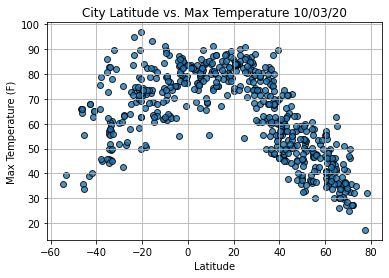

In [34]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

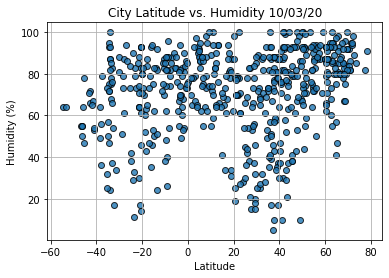

In [35]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

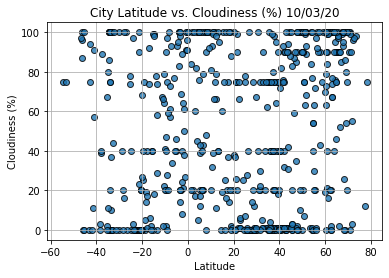

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


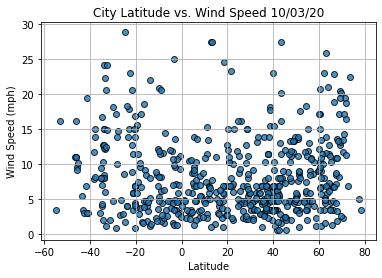

In [37]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()
